<a href="https://colab.research.google.com/github/Saikat1707/DigitClassificationUsingCNN/blob/main/CNN_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import required libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [5]:
#load the dataset
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

#reshape the train data
x_train = x_train.reshape((x_train.shape[0],28,28,1));
x_test = x_test.reshape((x_test.shape[0],28,28,1));

In [6]:
#normalize the data
x_train , x_test = x_train/255.0 , x_test/255.0;


In [14]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
 )

In [16]:
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8473 - loss: 0.4734 - val_accuracy: 0.9756 - val_loss: 0.0782
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9765 - loss: 0.0789 - val_accuracy: 0.9830 - val_loss: 0.0581
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9838 - loss: 0.0498 - val_accuracy: 0.9854 - val_loss: 0.0453
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9884 - loss: 0.0377 - val_accuracy: 0.9824 - val_loss: 0.0609
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9890 - loss: 0.0345 - val_accuracy: 0.9874 - val_loss: 0.0442
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9878 - val_loss: 0.0441
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9866 - val_loss: 0.0470
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9939 -

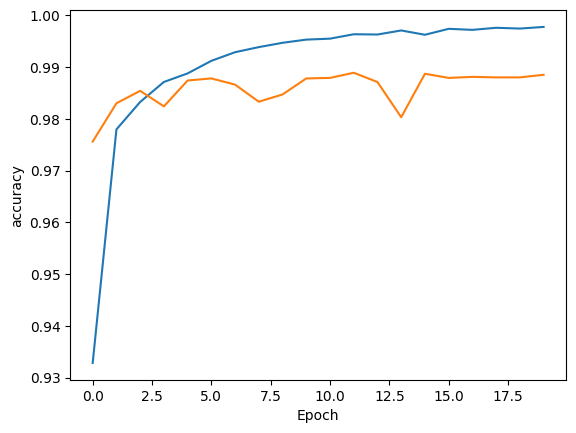

In [20]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

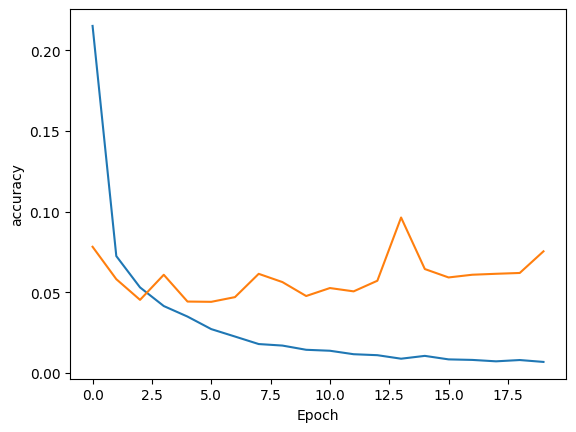

In [19]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9853 - loss: 0.0911

✅ Test accuracy: 0.9885
